# This model will predict whether a person has Covid19 or not by some data obtained from the internet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
import random
random_state=101
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,S. No.,Age,BodyTemp.,Fatigue,Cough,BodyPain,SoreThroat,BreathingDifficulty,Infected
0,1,94,98.603205,1,0,1,1,0,1
1,2,1,102.519485,0,1,1,0,2,1
2,3,65,101.799096,1,1,1,2,1,1
3,4,28,103.863706,0,1,0,1,2,0
4,5,75,102.155484,1,0,0,0,0,0


In [4]:
df.tail()

,S. No.,Age,BodyTemp.,Fatigue,Cough,BodyPain,SoreThroat,BreathingDifficulty,Infected
3995,3996,16,103.380497,0,1,0,0,2,1
3996,3997,82,103.224004,0,1,1,0,0,1
3997,3998,73,104.103678,0,1,0,0,1,0
3998,3999,27,104.557772,1,0,0,2,0,1
3999,4000,43,100.320435,0,1,1,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S. No.               4000 non-null   int64  
 1   Age                  4000 non-null   int64  
 2   BodyTemp.            4000 non-null   float64
 3   Fatigue              4000 non-null   int64  
 4   Cough                4000 non-null   int64  
 5   BodyPain             4000 non-null   int64  
 6   SoreThroat           4000 non-null   int64  
 7   BreathingDifficulty  4000 non-null   int64  
 8   Infected             4000 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 281.4 KB


In [6]:
df.describe()

,S. No.,Age,BodyTemp.,Fatigue,Cough,BodyPain,SoreThroat,BreathingDifficulty,Infected
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.00000
mean,2000.500000,49.888750,101.542417,0.511000,0.507750,0.51150,1.013000,1.016250,0.66275
std,1154.844867,29.115937,2.025641,0.499941,0.500002,0.49993,0.823104,0.814341,0.47283
min,1.000000,1.000000,98.000139,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,1000.750000,25.000000,99.793418,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
50%,2000.500000,49.000000,101.581286,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000
75%,3000.250000,75.000000,103.274928,1.000000,1.000000,1.00000,2.000000,2.000000,1.00000
max,4000.000000,100.000000,104.996821,1.000000,1.000000,1.00000,2.000000,2.000000,1.00000


In [7]:
df.isnull().sum()

S. No.                 0
Age                    0
BodyTemp.              0
Fatigue                0
Cough                  0
BodyPain               0
SoreThroat             0
BreathingDifficulty    0
Infected               0
dtype: int64

In [8]:
df['Infected'].value_counts()/len(df)*100

1    66.275
0    33.725
Name: Infected, dtype: float64

# LETS NOW DO SOME DATA ANALYSIS!!

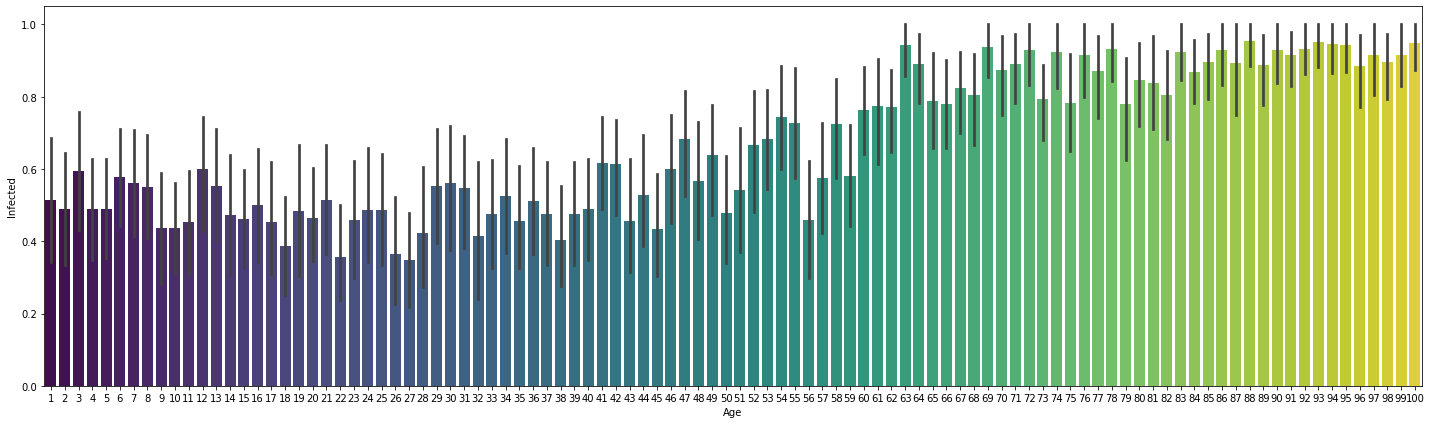

In [9]:
plt.figure(figsize=(20,6))
sns.barplot(x='Age',y='Infected',data=df,palette='viridis')
plt.tight_layout()

<AxesSubplot:xlabel='BreathingDifficulty', ylabel='count'>

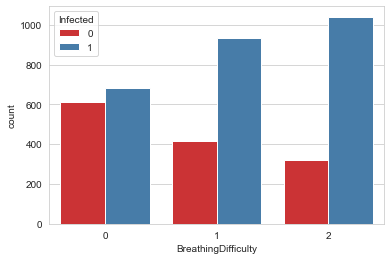

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='BreathingDifficulty',data=df,hue='Infected',palette='Set1')

<AxesSubplot:>

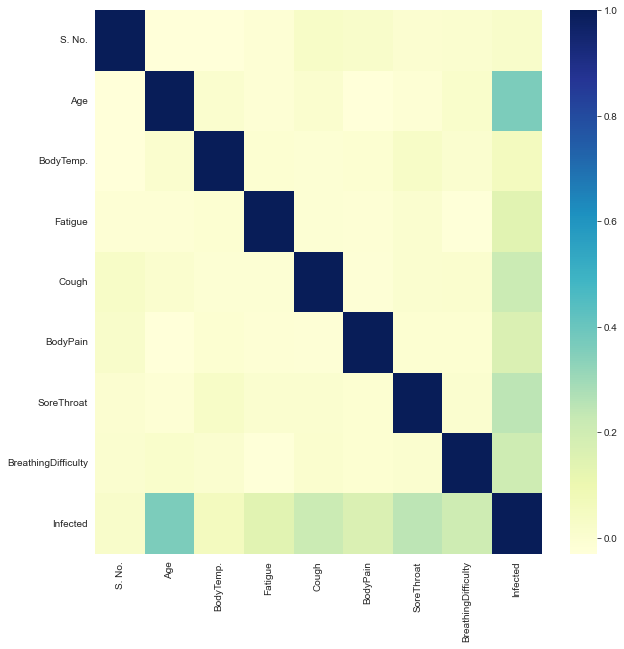

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="YlGnBu")

# Now lets train our model!

In [12]:
X=df.drop(['Infected','S. No.','BodyTemp.'],axis=1)
y=df['Infected']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lg=LogisticRegression()

In [17]:
lg.fit(X,y)

LogisticRegression()

In [18]:
y_pred=lg.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
print(confusion_matrix(y_test,y_pred))

[[ 98  45]
 [ 27 230]]


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       143
           1       0.84      0.89      0.86       257

    accuracy                           0.82       400
   macro avg       0.81      0.79      0.80       400
weighted avg       0.82      0.82      0.82       400



In [22]:
pickle.dump(lg,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))